# Getting Started With Exploratory Data Analysis (EDA)

<a href="https://colab.research.google.com/github/BU-Spark/ml-549-course/blob/main/phase3_EDA/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook serves as a starter guide or template for exploratory data analysis. It will go over the topics mentioned in the EDA guide. 

In [1]:
# let's start off by importing the libraries we will need for eda
import pandas as pd
import numpy as np 

# for visualizations : 
import seaborn as sns
import matplotlib.pyplot as plt

The dataset we will be using in this tutorial is from Analyze Boston. Analyze Boston is the City of Boston's data hub and is a great resource for data sets regarding the city. 

We will be working with the 2022 311 Service Requests dataset. The dataset consists of service requests from all channels of engagement. 311 allows you to report non-emergency issues or request non-emergency City services. 

Link: https://data.boston.gov/dataset/311-service-requests 

In [9]:
import os
import requests
from tqdm import tqdm

def download_csv(url, filename):
    # Check if the file already exists
    if os.path.exists(filename):
        print(f"The file {filename} already exists.")
        return

    response = requests.get(url, stream=True)

    total_size_in_bytes= int(response.headers.get('content-length', 0))
    block_size = 1024 #1 Kibibyte
    progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)

    with open(filename, 'wb') as file:
        for data in response.iter_content(block_size):
            progress_bar.update(len(data))
            file.write(data)
    progress_bar.close()
    if total_size_in_bytes != 0 and progress_bar.n != total_size_in_bytes:
        print("ERROR, something went wrong")

# Use the function
url = "https://data.boston.gov/datastore/dump/81a7b022-f8fc-4da5-80e4-b160058ca207?bom=True"
filename = "311-requests.csv"
download_csv(url, filename)

The file your2.csv already exists.


In [10]:
# read in dataset
df = pd.read_csv('311-requests.csv') 

In [11]:
# let's look at the first five rows of the dataset
df.head()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101004116078,2022-01-04 15:34:00,NaN,NaN,ONTIME,Open,,Abandoned Bicycle,Mayor's 24 Hour Hotline,Abandoned Bicycle,...,A7,East Boston,1,Ward 1,0109,163 Falcon St,2128.0,42.3818,-71.0322,Citizens Connect App
1,101004113538,2022-01-01 13:40:13,2022-01-04 08:30:00,2022-01-01 17:22:15,ONTIME,Closed,Case Closed. Closed date : Sat Jan 01 17:22:15...,CE Collection,Public Works Department,Street Cleaning,...,D4,South End,6,Ward 9,0902,520 Shawmut Ave,2118.0,42.3376,-71.0774,City Worker App
2,101004120888,2022-01-09 12:40:43,2022-01-11 08:30:00,2022-01-10 01:24:50,ONTIME,Closed,Case Closed. Closed date : Mon Jan 10 01:24:50...,CE Collection,Public Works Department,Street Cleaning,...,D4,South End,4,03,0307,44 Bradford St,2118.0,42.3431,-71.0683,City Worker App
3,101004120982,2022-01-09 13:56:00,NaN,NaN,ONTIME,Open,,Animal Generic Request,Animal Control,Animal Issues,...,A7,East Boston,1,Ward 1,0110,433 Chelsea St,2128.0,42.3810,-71.0256,Constituent Call
4,101004127209,2022-01-15 20:42:00,2022-01-20 08:30:00,2022-01-16 08:18:09,ONTIME,Closed,Case Closed Case Resolved,Building Inspection Request,Inspectional Services,Building,...,B2,Roxbury,13,Ward 8,0806,71 Proctor St,2119.0,42.3266,-71.0704,Constituent Call


How many observations/rows are there? <br>

How many variables/columns are there? <br>

What kinds of variables are there? Qualitative? Quantitative? Both? <br>

In [12]:
# number of observations 
df.shape[0]

146373

In [13]:
# to see column name, count, and dtype of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146373 entries, 0 to 146372
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   case_enquiry_id                 146373 non-null  int64  
 1   open_dt                         146373 non-null  object 
 2   target_dt                       129475 non-null  object 
 3   closed_dt                       125848 non-null  object 
 4   ontime                          146373 non-null  object 
 5   case_status                     146373 non-null  object 
 6   closure_reason                  146373 non-null  object 
 7   case_title                      146371 non-null  object 
 8   subject                         146373 non-null  object 
 9   reason                          146373 non-null  object 
 10  type                            146373 non-null  object 
 11  queue                           146373 non-null  object 
 12  department      

There are 146373 rows (observations). <br>

There are 29 columns (variables). <br> 

There are both categorical and numerical variables. At quick glance there seems to be more categorical variables than numerical variables. 

Categorical Variables:
```case_status```, ```neighborhood```, ```source```, etc. 

Numerical Variables: 
... maybe not?

The ```case_enquiry_id``` is a unique identifier for each row, ```closedphoto``` has 0 non-null values so it might be worth it to drop this column since there is no additional information we can gather, columns such as ```location_zipcode```, ```latitude```, ```longitude``` not exactly numeric varaibles, since they are numbers that represent different codes. 

### Cleaning 

Let's convert the three time variables (```open_dt```, ```target_dt```, and ```closed_dt```) from objects to pandas datetime objects.
Let's focus on service requests for a set period of time in 2022. 
We will start by filtering for service requests that were opened from January 2022 to March 2022. 

In [14]:
# changing the three columns with dates and times to pandas datetime object 
df['open_dt'] = pd.to_datetime(df['open_dt'])
df['target_dt'] = pd.to_datetime(df['target_dt'])
df['closed_dt'] = pd.to_datetime(df['closed_dt'])

# output is long, but run the line below to check the type of the three columns 
#df.dtypes

In [15]:
# filter data for 311 requests from january 2022 to march 2022 
df_filtered = df.loc[(df['open_dt'] >= '2022-01-01') &
                  (df['open_dt'] < '2022-03-31')]
df_filtered.head()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101004116078,2022-01-04 15:34:00,NaT,NaT,ONTIME,Open,,Abandoned Bicycle,Mayor's 24 Hour Hotline,Abandoned Bicycle,...,A7,East Boston,1,Ward 1,0109,163 Falcon St,2128.0,42.3818,-71.0322,Citizens Connect App
1,101004113538,2022-01-01 13:40:13,2022-01-04 08:30:00,2022-01-01 17:22:15,ONTIME,Closed,Case Closed. Closed date : Sat Jan 01 17:22:15...,CE Collection,Public Works Department,Street Cleaning,...,D4,South End,6,Ward 9,0902,520 Shawmut Ave,2118.0,42.3376,-71.0774,City Worker App
2,101004120888,2022-01-09 12:40:43,2022-01-11 08:30:00,2022-01-10 01:24:50,ONTIME,Closed,Case Closed. Closed date : Mon Jan 10 01:24:50...,CE Collection,Public Works Department,Street Cleaning,...,D4,South End,4,03,0307,44 Bradford St,2118.0,42.3431,-71.0683,City Worker App
3,101004120982,2022-01-09 13:56:00,NaT,NaT,ONTIME,Open,,Animal Generic Request,Animal Control,Animal Issues,...,A7,East Boston,1,Ward 1,0110,433 Chelsea St,2128.0,42.3810,-71.0256,Constituent Call
4,101004127209,2022-01-15 20:42:00,2022-01-20 08:30:00,2022-01-16 08:18:09,ONTIME,Closed,Case Closed Case Resolved,Building Inspection Request,Inspectional Services,Building,...,B2,Roxbury,13,Ward 8,0806,71 Proctor St,2119.0,42.3266,-71.0704,Constituent Call


From our previous observation, since ```closedphoto``` column does not contain any non-null values, let's drop it. 

In [16]:
# drop closedphoto column
df_filtered = df_filtered.drop(columns=['closedphoto'])

After filtering the service requests, let's see how many observations we are left with.  

In [17]:
# how many requests were opened from Jan 2022 to March 2022
df_filtered.shape[0]

66520

From a quick preview of the dataframe, we can see that some of the requests are still open. 
Let's see how many observations are open vs. closed and then how many are ontime vs. overdue from the set of requests from January 2022 to March 2022. 

In [18]:
# checking how many open vs. closed cases
df_filtered['case_status'].value_counts()

case_status
Closed    59420
Open       7100
Name: count, dtype: int64

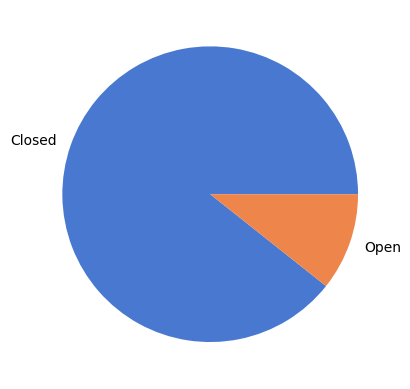

In [19]:
# visualize case_status in pie chart, set color palette 
colors = sns.color_palette('muted')[0:5]
ax = df_filtered['case_status'].value_counts().plot.pie(colors=colors)
ax.yaxis.set_visible(False)

In [20]:
# checking how many ontime vs. overdue cases 
df_filtered['ontime'].value_counts()

ontime
ONTIME     55089
OVERDUE    11431
Name: count, dtype: int64

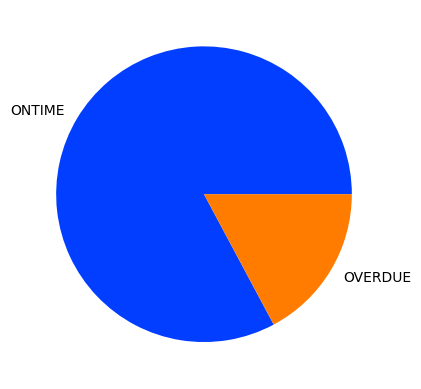

In [21]:
# visualize ontime in pie chart, set color palette 
colors = sns.color_palette('bright')[0:5]
ax = df_filtered['ontime'].value_counts().plot.pie(colors=colors)
ax.yaxis.set_visible(False)

### Descriptive Statistics 

Pandas makes this easy! We can use ```describe()``` to get the descriptive statistics of the numerical columns. 

In [22]:
df_filtered.describe()

,case_enquiry_id,open_dt,target_dt,closed_dt,location_zipcode,latitude,longitude
count,6.652000e+04,66520,59499,59420,49807.000000,66520.000000,66520.000000
mean,1.010042e+11,2022-02-16 00:24:51.125015040,2022-03-08 23:02:41.569135360,2022-02-19 23:41:35.984365568,2126.916719,42.335694,-71.075337
min,1.010041e+11,2022-01-01 00:16:00,2022-01-02 09:10:15,2022-01-01 05:01:32,2108.000000,42.231500,-71.185400
25%,1.010042e+11,2022-01-29 19:33:15,2022-02-02 13:04:10.500000,2022-01-31 15:15:18.249999872,2119.000000,42.314500,-71.087600
50%,1.010042e+11,2022-02-14 18:52:30,2022-02-22 08:30:00,2022-02-17 05:29:19,2126.000000,42.345900,-71.062200
75%,1.010042e+11,2022-03-08 13:41:15,2022-03-16 15:05:26.500000,2022-03-11 12:08:20.750000128,2130.000000,42.359400,-71.058700
max,1.010042e+11,2022-03-30 23:41:46,2024-03-19 20:43:37,2022-07-10 09:39:55,2467.000000,42.395200,-70.994900
std,3.745629e+04,NaN,NaN,NaN,17.188931,0.032066,0.032259


As mentioned before, the ```case_enquiry_id```, ```location_zipcode```, ```latitude```, and ```longitude``` columns are not numeric variables. The descriptive statistics are not very useful in this situation. 

What would be a useful numeric variable is the duration of a request. Let's calculate the duration of each of the requests from January 2022 to March 2022 and add it as a new column in our dataframe. 

In [23]:
# calculating case duration and adding a new column (case_duration) to the dataframe 
duration = df_filtered['closed_dt'] - df_filtered['open_dt']
df_filtered = df_filtered.assign(case_duration=duration)
df_filtered.head()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source,case_duration
0,101004116078,2022-01-04 15:34:00,NaT,NaT,ONTIME,Open,,Abandoned Bicycle,Mayor's 24 Hour Hotline,Abandoned Bicycle,...,East Boston,1,Ward 1,0109,163 Falcon St,2128.0,42.3818,-71.0322,Citizens Connect App,NaT
1,101004113538,2022-01-01 13:40:13,2022-01-04 08:30:00,2022-01-01 17:22:15,ONTIME,Closed,Case Closed. Closed date : Sat Jan 01 17:22:15...,CE Collection,Public Works Department,Street Cleaning,...,South End,6,Ward 9,0902,520 Shawmut Ave,2118.0,42.3376,-71.0774,City Worker App,0 days 03:42:02
2,101004120888,2022-01-09 12:40:43,2022-01-11 08:30:00,2022-01-10 01:24:50,ONTIME,Closed,Case Closed. Closed date : Mon Jan 10 01:24:50...,CE Collection,Public Works Department,Street Cleaning,...,South End,4,03,0307,44 Bradford St,2118.0,42.3431,-71.0683,City Worker App,0 days 12:44:07
3,101004120982,2022-01-09 13:56:00,NaT,NaT,ONTIME,Open,,Animal Generic Request,Animal Control,Animal Issues,...,East Boston,1,Ward 1,0110,433 Chelsea St,2128.0,42.3810,-71.0256,Constituent Call,NaT
4,101004127209,2022-01-15 20:42:00,2022-01-20 08:30:00,2022-01-16 08:18:09,ONTIME,Closed,Case Closed Case Resolved,Building Inspection Request,Inspectional Services,Building,...,Roxbury,13,Ward 8,0806,71 Proctor St,2119.0,42.3266,-71.0704,Constituent Call,0 days 11:36:09


Now we can see the new ```case_duration``` column. Some values are ```NaT```, which means there is a missing date. This makes sense because the ```case_status``` is ```OPEN```. 

Let's filter out the open cases and focus on analyzing the duration of the closed cases. 

In [24]:
# filter out the open cases
df_closed = df_filtered.loc[(df_filtered['case_status'] == "Closed")]
df_closed.head()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source,case_duration
1,101004113538,2022-01-01 13:40:13,2022-01-04 08:30:00,2022-01-01 17:22:15,ONTIME,Closed,Case Closed. Closed date : Sat Jan 01 17:22:15...,CE Collection,Public Works Department,Street Cleaning,...,South End,6,Ward 9,0902,520 Shawmut Ave,2118.0,42.3376,-71.0774,City Worker App,0 days 03:42:02
2,101004120888,2022-01-09 12:40:43,2022-01-11 08:30:00,2022-01-10 01:24:50,ONTIME,Closed,Case Closed. Closed date : Mon Jan 10 01:24:50...,CE Collection,Public Works Department,Street Cleaning,...,South End,4,03,0307,44 Bradford St,2118.0,42.3431,-71.0683,City Worker App,0 days 12:44:07
4,101004127209,2022-01-15 20:42:00,2022-01-20 08:30:00,2022-01-16 08:18:09,ONTIME,Closed,Case Closed Case Resolved,Building Inspection Request,Inspectional Services,Building,...,Roxbury,13,Ward 8,0806,71 Proctor St,2119.0,42.3266,-71.0704,Constituent Call,0 days 11:36:09
5,101004113302,2022-01-01 00:36:24,2022-01-04 08:30:00,2022-01-03 00:13:17,ONTIME,Closed,Case Closed. Closed date : 2022-01-03 00:13:17...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,South Boston / South Boston Waterfront,5,6,0601,INTERSECTION Seaport Blvd & Sleeper St,NaN,42.3594,-71.0587,Citizens Connect App,1 days 23:36:53
6,101004113331,2022-01-01 03:11:23,NaT,2022-01-04 08:23:30,ONTIME,Closed,Case Closed. Closed date : 2022-01-04 08:23:30...,Loud Parties/Music/People,Boston Police Department,Noise Disturbance,...,South End,6,9,0901,INTERSECTION W Brookline St & Newland St,NaN,42.3594,-71.0587,Constituent Call,3 days 05:12:07


With the closed cases, let's calculate the descriptive statistics of the new ```case_duration``` column. 

In [25]:
# let's calculate the descriptive statistics again 
# using double brackets to display in a *fancy* table format
df_closed[['case_duration']].describe()

,case_duration
count,59420
mean,4 days 12:09:14.466526422
std,15 days 09:54:44.441079417
min,0 days 00:00:04
25%,0 days 01:26:54.750000
50%,0 days 09:01:45
75%,1 days 15:40:08.250000
max,181 days 14:24:23


From the table, we can see that the average case duration is ~4.5 days. <br>
The standard deviation for the case duration is ~15.4 days. <br>
The minimum time a case takes to close is 4 minutes. <br>
The maximum time a case takes to close is ~181.6 days. <br>
The inter-quartile range (IQR) is the difference between the 25% and 75% quantiles. <br>


We can also calculate the *mode* and *median*.

In [26]:
df_closed['case_duration'].mode()

0   0 days 00:00:54
1   0 days 00:00:57
2   0 days 00:01:03
Name: case_duration, dtype: timedelta64[ns]

In [27]:
df_closed['case_duration'].median()

Timedelta('0 days 09:01:45')

The descriptive statistics summary in table form is nice, but it would be nice to visualize the data in a histogram. Simply trying to plot using the values in the ```case_duration``` column will case an error. 

Currently, the values in ```case_duration``` are of type ```timedelta64[ns]```, ```df_closed['case_duration']``` is a Timedelta Series. We will need to apply what is called a frequency conversion to the values. 

"Timedelta Series, TimedeltaIndex, and Timedelta scalars can be converted to other 'frequences' by dividing by another timedelta, or by astyping to a specific timedelta type." (See the link below for more information and code examples!)

https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html


In [28]:
# dividing the case_duration values by Timedelta of 1 day 
duration_days = ( df_closed['case_duration'] / pd.Timedelta(days=1))

# adding calculation to dataframe under duration_in_days column 
df_closed = df_closed.assign(duration_in_days=duration_days)

# display descriptive statistics summary with new column addition 
df_closed[['duration_in_days']].describe()

,duration_in_days
count,59420.000000
mean,4.506417
std,15.413014
min,0.000046
25%,0.060356
50%,0.376215
75%,1.652873
max,181.600266


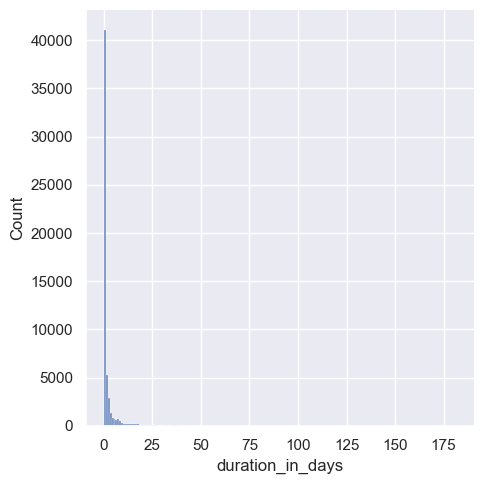

In [29]:
# using seaborn library for visualizations 
sns.set_theme() # use this if you dont want the visualizations to be default matplotlibstyle
sns.displot(df_closed, x="duration_in_days", binwidth=1)

From the plot above, the data seems to be skewed right meaning the right tail is much longer than the left. Let's try playing with different bin widths. 

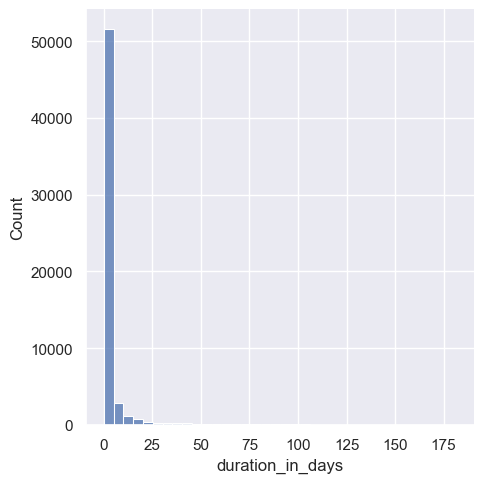

In [30]:
# trying different bin sizes 
sns.displot(df_closed, x="duration_in_days", binwidth=5)

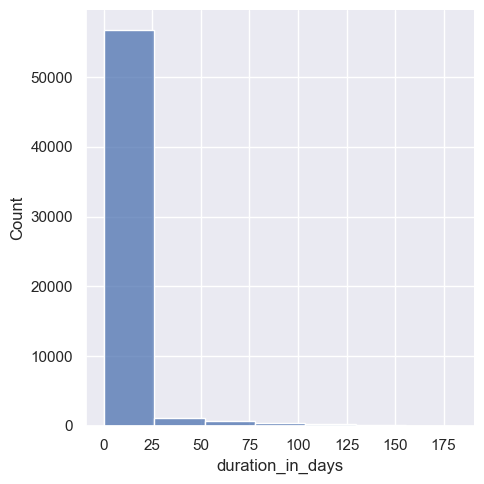

In [31]:
# trying different bin sizes
sns.displot(df_closed, x="duration_in_days", binwidth=25)

Since the data is heavily skewed, let's apply log transformation to the data. The log transformation will *hopefully* reduce or remove the skewness of the original data. The assumption is that the original data follows a log-normal distribution. 

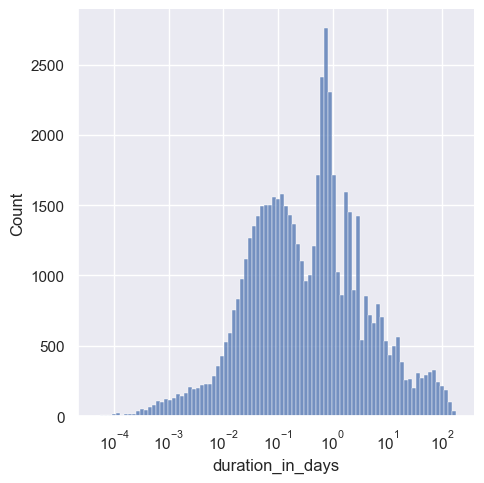

In [32]:
# log-scale transformation since the data is heavliy skewed 
# add bin_width parameter to change bin sizes
sns.displot(df_closed, x="duration_in_days", log_scale=True)

### Which neighborhoods had the most requests from January 2022 - March 2022? 

To answer this question, we will take a look at the ```neighborhood``` column. 

In [33]:
# has 25 unique values so a pie chart probably is not the best option
len(df_closed['neighborhood'].unique()) 

25

Text(0.5, 1.0, 'Number of Requests by Neighborhood')

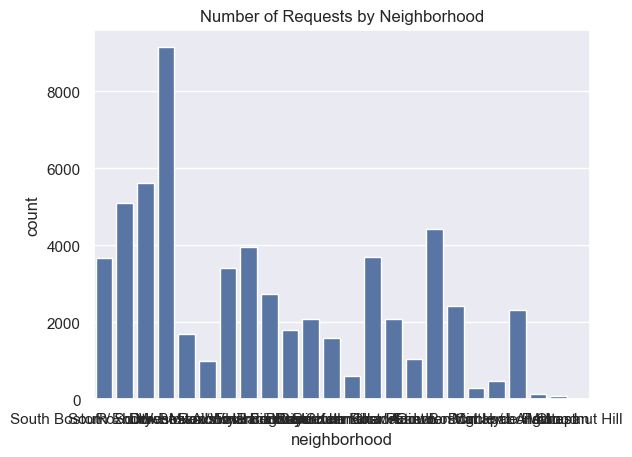

In [34]:
# plot neighborhood counts 
sns.countplot(x="neighborhood", data=df_closed).set_title('Number of Requests by Neighborhood')

Yikes! The x-axis labels are pretty hard to read. Let's fix that by plotting the bars horizontally. 

Text(0.5, 1.0, 'Number of Requests by Neighborhood')

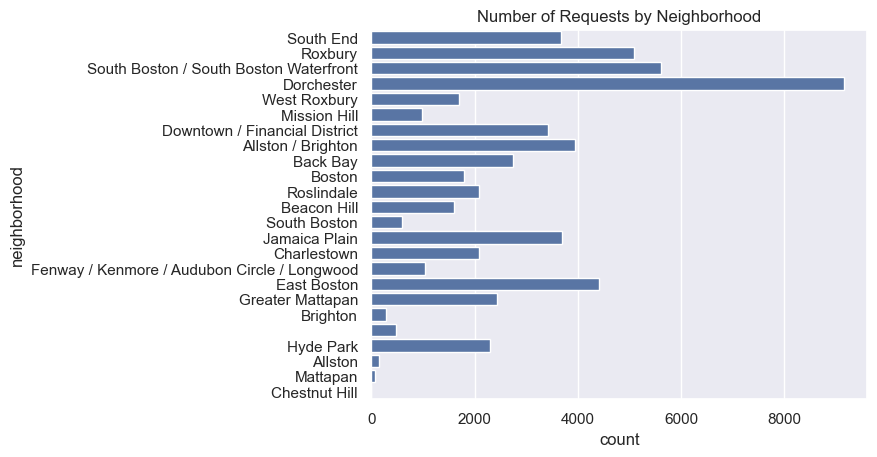

In [35]:
# fixing orientation of the labels 
sns.countplot(y="neighborhood", data=df_closed).set_title('Number of Requests by Neighborhood')

From the plot we can see that Dorchester has the most requests, followed by South Boston/South Boston Waterfront, then Roxbury. There's a bar that doesn't have a name...that's strange. Let's display the exact counts for each neighborhood. 

In [36]:
# displaying number of requests by neighborhood in table form 
df_closed['neighborhood'].value_counts()

neighborhood
Dorchester                                      9148
South Boston / South Boston Waterfront          5608
Roxbury                                         5097
East Boston                                     4420
Allston / Brighton                              3945
Jamaica Plain                                   3696
South End                                       3666
Downtown / Financial District                   3419
Back Bay                                        2740
Greater Mattapan                                2429
Hyde Park                                       2308
Charlestown                                     2096
Roslindale                                      2083
Boston                                          1803
West Roxbury                                    1698
Beacon Hill                                     1595
Fenway / Kenmore / Audubon Circle / Longwood    1034
Mission Hill                                     990
South Boston                     

There are 476 requests without a neighborhood label. 

In [37]:
# uncomment and run the line below to check for the empty neighborhood label 
# print(df_closed['neighborhood'].unique())

# gather the rows where neighborhood == ' ' 
df_no_neighborhood = df_closed.loc[(df_closed['neighborhood'] == ' ')]
df_no_neighborhood.head(15) # display first 15 rows

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source,case_duration,duration_in_days
163,101004115729,2022-01-04 11:11:00,2022-02-03 11:11:34,2022-01-05 09:43:58,ONTIME,Closed,Case Closed. Closed date : Wed Jan 05 09:43:58...,DISPATCHED Heat - Excessive Insufficient,Inspectional Services,Housing,...,,,,NaN,NaN,42.3594,-71.0587,Constituent Call,0 days 22:32:58,0.939560
207,101004117130,2022-01-05 14:25:00,2022-01-14 14:25:51,2022-02-10 10:59:15,OVERDUE,Closed,Case Closed. Closed date : Thu Feb 10 10:59:15...,printed,Parks & Recreation Department,Park Maintenance & Safety,...,,,,NaN,NaN,42.3594,-71.0587,Constituent Call,35 days 20:34:15,35.857118
301,101004118921,2022-01-07 12:55:08,NaT,2022-01-10 09:20:39,ONTIME,Closed,Case Closed. Closed date : 2022-01-10 09:20:39...,General Comments For An Employee,Mayor's 24 Hour Hotline,Employee & General Comments,...,,,,NaN,NaN,42.3594,-71.0587,Constituent Call,2 days 20:25:31,2.851053
640,101004123032,2022-01-11 14:00:00,2022-01-25 14:00:53,2022-01-12 12:37:49,ONTIME,Closed,Case Closed. Closed date : Wed Jan 12 12:37:49...,PublicWorks: Complaint,Mayor's 24 Hour Hotline,Employee & General Comments,...,,,,NaN,NaN,42.3594,-71.0587,Constituent Call,0 days 22:37:49,0.942928
882,101004121696,2022-01-10 10:35:00,2022-01-17 10:35:33,2022-01-10 11:06:04,ONTIME,Closed,Case Closed. Closed date : Mon Jan 10 11:06:04...,Ground Maintenance: Brewer/Burroughs Tot Lot -...,Parks & Recreation Department,Park Maintenance & Safety,...,,,,NaN,NaN,42.3594,-71.0587,Employee Generated,0 days 00:31:04,0.021574
1280,101004141822,2022-01-20 12:49:51,2022-01-31 12:49:51,2022-01-21 10:30:31,ONTIME,Closed,Case Closed. Closed date : Fri Jan 21 10:30:31...,Parks Lighting Issue: Mozart St. Playground - ...,Parks & Recreation Department,Park Maintenance & Safety,...,,,,NaN,NaN,42.3594,-71.0587,Self Service,0 days 21:40:40,0.903241
1509,101004129011,2022-01-18 09:11:00,2022-02-01 09:11:09,2022-01-18 10:22:18,ONTIME,Closed,Case Closed. Closed date : Tue Jan 18 10:22:18...,PublicWorks: Complaint,Mayor's 24 Hour Hotline,Employee & General Comments,...,,,,NaN,NaN,42.3594,-71.0587,Constituent Call,0 days 01:11:18,0.049514
1574,101004144874,2022-01-24 09:32:51,2022-02-07 09:32:51,2022-01-24 09:55:04,ONTIME,Closed,Case Closed Case Noted,PublicWorks: Complaint,Mayor's 24 Hour Hotline,Employee & General Comments,...,,,,NaN,NaN,42.3594,-71.0587,Constituent Call,0 days 00:22:13,0.015428
1612,101004146190,2022-01-25 12:48:25,2022-02-08 12:48:25,2022-01-25 16:24:50,ONTIME,Closed,Case Closed. Closed date : 2022-01-25 16:24:50...,Other: Comment,Mayor's 24 Hour Hotline,Employee & General Comments,...,,,,NaN,NaN,42.3594,-71.0587,Constituent Call,0 days 03:36:25,0.150289
1777,101004145555,2022-01-24 18:24:00,2022-02-03 08:30:00,2022-02-09 09:32:31,OVERDUE,Closed,Case Closed. Closed date : Wed Feb 09 09:32:31...,Parks Lighting Issue: Brophy Park - BPRD,Parks & Recreation Department,Park Maintenance & Safety,...,,,,NaN,NaN,42.3594,-71.0587,Constituent Call,15 days 15:08:31,15.630914


In [38]:
print(df_no_neighborhood['latitude'].unique())
print(df_no_neighborhood['longitude'].unique())

[42.3594]
[-71.0587]


The latitude and longitude values are the same for all of the rows without a ```neighborhood``` value. We can use the *Geopy* module to convert the latitude and longitude coordinates to a place or location address - also referred to as reverse geocoding. 

In [39]:
# import geopy 
from geopy.geocoders import Nominatim 

# make a Nominatim object and initialize, specify a user_agent 
# Nominatim requires this value to be set to your application name, to be able to limit the number of requests per application
# Nominatim is a free service but provides low request limits: https://operations.osmfoundation.org/policies/nominatim/
geolocator = Nominatim(user_agent="eda_geotest")

# set latitude and longitude and convert to string 
lat = str(df_no_neighborhood['latitude'].unique()[0])
long = str(df_no_neighborhood['longitude'].unique()[0])

# get the location information
location = geolocator.reverse(lat + "," +long)

# display location information, add .raw for more details
print(location.raw)

ModuleNotFoundError: No module named 'geopy'

Quick Google Maps search of the location confirms that (42.3594, -71.0587) is Government Center. The output from *geopy* is Sear's Crescent and Sears' Block which are a pair of buildings adjacent to City Hall and City Hall Plaza, Government Center.

Another quick look at the output from *geopy* shows that the ```lat``` and ```lon``` values are similar but different from the latitude and longitude values in the dataset. 

The requests without a neighborhood value have a general location of Government Center. At least we can confirm that requests without a neighborhood value are not outside of Boston or erroneous. 


### During January 2022 - March 2022, where did the most case requests come from?

To answer this question, we will take a look at the ```source``` column. 

In [ ]:
# has only 5 unique values so in this case we can use a pie chart 
len(df_closed['source'].unique())

In [ ]:
# displaying the number of requests by each source type 
df_closed['source'].value_counts()

In [ ]:
# visualizing the breakdown of where case requests come from 
# seaborn doesn't have a default pie chart but you can add seaborn color palettes to matplotlib plots

colors = sns.color_palette('pastel')[0:5]
ax = df_closed['source'].value_counts().plot.pie(colors=colors)

In [ ]:
# label each slice with the percentage of requests per source 
ax = df_closed['source'].value_counts().plot.pie(colors=colors,autopct='%1.1f%%')

# run the following to remove the default column name label *source*
#ax.yaxis.set_visible(False)

From the pie chart, 54% of the requests from January 2022 - March 2022 came from the Citizens Connect App, 35.4% came from a Constituent Call, followed by 6.4% from the City Worker App. 

### How many different types of requests were there from January 2022 - March 2022?

To answer this question, we will take a look at the ```reason``` column. 

In [ ]:
# how many different reasons are there 
len(df_closed['reason'].unique())

In [ ]:
# number of requests by reason 
df_closed['reason'].value_counts()

There were 38 different types of requests from January 2022 - March 2022, the top three with most requests being *Enforcement & Abandoned Vehicles* with 14,908 requests, *Code Enforcement* with 10,437 requests, then *Street Cleaning* with 8,477 requests. 

In [ ]:
# top case request reason by neighborhood 
df_closed.groupby(['neighborhood'])['reason'].describe()

In [ ]:
# get counts for each request reason by neighborhood 
reason_by_neighborhood = df_closed.groupby(['neighborhood', 'reason'])['duration_in_days'].describe()[['count']]
reason_by_neighborhood

In [ ]:
# run this cell to write the reason by neighborhood to a csv to see all rows of data 
reason_by_neighborhood.to_csv('reasons_by_neighborhood.csv')

In [ ]:
# let's take a look at the South End neighborhood specifically 
south_end_df = df_closed.loc[(df_closed['neighborhood'] == 'South End')]
south_end_df.groupby(['reason'])['duration_in_days'].describe()[['count']]

### What types of cases typically take the longest to resolve?

To answer this question, let's take a look at the ```duration_in_days``` and ```reason``` columns.

In [ ]:
# what types of cases typically take the longest 
# case_duration by reason 

sns.catplot(x="reason", y="duration_in_days", kind="box", data=df_closed,)

In [ ]:
# The chart is kind of difficult to read... 
# Let's fix the size of the chart and flip the labels on the x-axis 

sns.catplot(y="reason", x="duration_in_days", kind="box", data=df_closed,
            height = 8, aspect = 1.25)

Box plots display the five-number-summary, which includes: the minimum, the maximum, the sample median, and the first and third quartiles. 

The box plot shows the distribution ```duration_in_days``` in a way that allows comparisions between case ```reasons```. Box plots show the distribution of a numerical variable broken down by a categorical variable. 

The box shows the quartiles of the ```duration_in_days``` and the whiskers extend to show the rest of the distribution (minimum and maximum). Points that are shown outside of the whiskers are determined to be *outliers*. The line inside the box is the median. 

In [ ]:
# descriptive statistics for duration_in_days by case reason 
# box plot in table form 
df_closed.groupby(['reason'])['duration_in_days'].describe()

Graffiti cases take on average take the longests time to resolve, 60.796 days. 

Do cases typically take longer in one neighborhood over another?

In [ ]:
# do cases typically take longer in one neighborhood over another?

sns.catplot(y="neighborhood", x="duration_in_days", kind="box", data=df_closed,
            height = 8, aspect = 1.25)

The box plot above shows several outliers for each category (```neighborhood```) making it difficult to read and quite overwhelming. 

Let's display the information in table form. 

In [ ]:
# in table form 
df_closed.groupby(['neighborhood'])['duration_in_days'].describe()

In January 2022 - March 2022, cases took the longest in Chestnut Hill. Cases typically lasted on average 19.075 days but there were only 4 cases located in Chestnut Hill during this time. Smaller sample sizes could mean more variability (look at standard deviation to explain the spread of observations).  

We can further look at the population of Chestnut Hill versus the other neighborhoods to try and make sense of this low case count. Additionally, we can broaden the time period of the cases to see if Chestnut Hill still has a low case count. 

From the table above we can see how long cases take by each neighborhood, it would be interesting to further breakdown by case reason for each neighborhood. 

### Wrap Up, Next Steps 

Further analysis could be done using the 311 dataset. Using the 311 data from previous years, we can see how number of requests have changed over the years, or how case duration may have changed over the years. 

Since most requests have latitude and longitude coordinates it could be interesting to plot each case request on a map to see if there are clusters of requests in certain locations.  

Next steps could include gathering demographic data to overlay on top of the 311 dataset for further analysis. Another possible next step would be to build a model to predict how long a request could take given the request reason, subject, location, source, etc. 